In [59]:
ROOT_DIR = '/content'

In [60]:
import shutil
import os

ZIP_DIR = os.path.join(ROOT_DIR, 'COVID-19_Radiography_Dataset')

if os.path.exists(ZIP_DIR):
    shutil.rmtree('COVID-19_Radiography_Dataset')
    print('COVID-19_Radiography_Dataset is removed !')

COVID-19_Radiography_Dataset is removed !


In [62]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/Git/ICT_Visual/Data/covid-19.zip') as target_file:
    target_file.extractall()

# 필요한 데이터만 Train directory로 이동

In [63]:
import shutil
import os

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'COVID-19')
TRAIN_ROOT_DIR = os.path.join(DATA_ROOT_DIR,'train')
TEST_ROOT_DIR = os.path.join(DATA_ROOT_DIR,'test')

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree('COVID-19')
    print('COVID-19 is removed !')

COVID-19 is removed !


In [64]:
DATA_SCR_DIR = os.path.join(ROOT_DIR,'COVID-19_Radiography_Dataset')
total_file_list = os.listdir(DATA_SCR_DIR)
label_name_list = [ file_name for file_name in total_file_list if os.path.isdir(os.path.join(DATA_SCR_DIR,file_name)) == True]


In [65]:
if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)
    print(DATA_ROOT_DIR, 'is removed !')

In [66]:
# 디렉토리 생성
os.mkdir(DATA_ROOT_DIR)
os.mkdir(TRAIN_ROOT_DIR)
os.mkdir(TEST_ROOT_DIR)
for label_name in label_name_list:
    os.mkdir(os.path.join(TEST_ROOT_DIR,label_name))

In [67]:
for label_name in label_name_list:
    scr_dir = os.path.join(DATA_SCR_DIR,label_name,'images')
    dst_dir = os.path.join(TRAIN_ROOT_DIR,label_name)
    shutil.copytree(scr_dir,dst_dir)
    
    print('total', label_name, 'nums =>',len(os.listdir(scr_dir)))
    print(scr_dir, 'is copy to', dst_dir)
    

total Viral Pneumonia nums => 1345
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images is copy to /content/COVID-19/train/Viral Pneumonia
total Lung_Opacity nums => 6012
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images is copy to /content/COVID-19/train/Lung_Opacity
total Normal nums => 10192
/content/COVID-19_Radiography_Dataset/Normal/images is copy to /content/COVID-19/train/Normal
total COVID nums => 3616
/content/COVID-19_Radiography_Dataset/COVID/images is copy to /content/COVID-19/train/COVID


# 전체 개수 확인

In [68]:
for label_name in label_name_list:
    print('total', label_name,'nums =>', len(os.listdir(os.path.join(TRAIN_ROOT_DIR,label_name))))

total Viral Pneumonia nums => 1345
total Lung_Opacity nums => 6012
total Normal nums => 10192
total COVID nums => 3616


# Train Test Directory Split

In [69]:
import random
split_ratio = 0.2

for label_name in label_name_list:
    file_list = os.listdir(os.path.join(TRAIN_ROOT_DIR,label_name))
    
    random.shuffle(file_list)

    split_num = int(len(file_list)*split_ratio)
    test_file_list = file_list[0:split_num]
    
    move_nums = 0
    for file_name in test_file_list:
        try:
            shutil.move(os.path.join(TRAIN_ROOT_DIR,label_name,file_name),
                        os.path.join(TEST_ROOT_DIR,label_name,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(label_name, move_nums,'files moved (train => test)')


Viral Pneumonia 269 files moved (train => test)
Lung_Opacity 1202 files moved (train => test)
Normal 2038 files moved (train => test)
COVID 723 files moved (train => test)


# 이미지 출력

In [70]:
import numpy as np
import cv2

for label_name in label_name_list:
    
    file_name_list = os.listdir(os.path.join(TRAIN_ROOT_DIR,label_name))

    width_list = []
    height_list = []

    for file_name in file_name_list:
        img = cv2.imread(os.path.join(TRAIN_ROOT_DIR,label_name,file_name),cv2.IMREAD_COLOR)
        width_list.append(img.shape[0])        
        height_list.append(img.shape[1])
    
    width_np = np.array(width_list)
    height_np = np.array(height_list)
    print(label_name, 'width avg : ', np.average(width_np), 'height avg', np.average(height_np))
    print(label_name, 'width std : ', np.std(width_np), 'height std', np.std(height_np))
    print(label_name, 'width max : ', np.max(width_np), 'height max', np.max(height_np))
    print(label_name, 'width min : ', np.min(width_np), 'height min', np.min(height_np))
    print('================================================')



Viral Pneumonia width avg :  299.0 height avg 299.0
Viral Pneumonia width std :  0.0 height std 0.0
Viral Pneumonia width max :  299 height max 299
Viral Pneumonia width min :  299 height min 299
Lung_Opacity width avg :  299.0 height avg 299.0
Lung_Opacity width std :  0.0 height std 0.0
Lung_Opacity width max :  299 height max 299
Lung_Opacity width min :  299 height min 299
Normal width avg :  299.0 height avg 299.0
Normal width std :  0.0 height std 0.0
Normal width max :  299 height max 299
Normal width min :  299 height min 299
COVID width avg :  299.0 height avg 299.0
COVID width std :  0.0 height std 0.0
COVID width max :  299 height max 299
COVID width min :  299 height min 299


# 이미지 사이즈 정의

In [92]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# ImageDataGenerator 정의

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [94]:
train_data = train_gen.flow_from_directory(directory=TRAIN_ROOT_DIR,
                                           batch_size=16,color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH,IMG_HEIGHT))
test_data = test_gen.flow_from_directory(directory=TEST_ROOT_DIR,
                                           batch_size=16,color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


# 모델링

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet


In [96]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

In [97]:
class_num = train_data.num_classes

model = Sequential()

model.add(mobilenet)

model.add(GlobalAveragePooling2D())


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(class_num,activation='relu'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_8   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_20 (Dense)            (None, 64)                65600     
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 4)                 260       
                                                                 
Total params: 3,294,724
Trainable params: 3,272,836
No

In [98]:
model.compile(optimizer=Adam(2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [99]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=30,
                 validation_data=test_data,
                 callbacks=[earlystop])

end_time = datetime.now()

print('\n\nElapsed time =>', end_time - start_time)

Epoch 1/30
1059/1059 [==============================] - 121s 111ms/step - loss: 1.9976 - acc: 0.5774 - val_loss: 0.9934 - val_acc: 0.7495
Epoch 2/30
1059/1059 [==============================] - 115s 109ms/step - loss: 1.1397 - acc: 0.7350 - val_loss: 0.8116 - val_acc: 0.7956
Epoch 3/30
1059/1059 [==============================] - 116s 109ms/step - loss: 1.0740 - acc: 0.7875 - val_loss: 0.8329 - val_acc: 0.8315
Epoch 4/30
1059/1059 [==============================] - 114s 108ms/step - loss: 0.9553 - acc: 0.8113 - val_loss: 0.7203 - val_acc: 0.8410
Epoch 5/30
1059/1059 [==============================] - 115s 109ms/step - loss: 0.9942 - acc: 0.8208 - val_loss: 0.7154 - val_acc: 0.8677
Epoch 6/30
1059/1059 [==============================] - 115s 109ms/step - loss: 0.8214 - acc: 0.8307 - val_loss: 0.6860 - val_acc: 0.8606
Epoch 7/30
1059/1059 [==============================] - 115s 109ms/step - loss: 0.7989 - acc: 0.8436 - val_loss: 0.6358 - val_acc: 0.8771
Epoch 8/30
1059/1059 [============

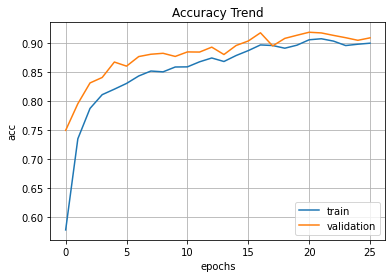

In [100]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()

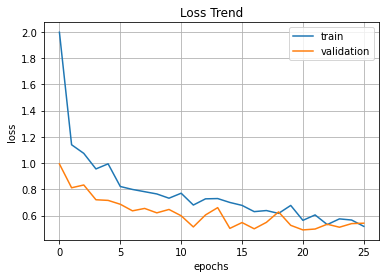

In [101]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [102]:
model.evaluate(test_data)

265/265 [==============================] - 13s 47ms/step - loss: 0.5416 - acc: 0.9095


[0.5416239500045776, 0.9094990491867065]